In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar los datos
file_path = 'data/data_cleaned.csv'
data = pd.read_csv(file_path)

# Explorar el dataset
print("Información del Dataset:")
print(data.info())
print("\nPrimeras filas del Dataset:")
print(data.head())



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10806 non-null  object 
 1   Genero                      10806 non-null  object 
 2   Casado                      10806 non-null  object 
 3   Edad                        10806 non-null  int64  
 4   Graduado                    10806 non-null  object 
 5   Profesion                   10806 non-null  object 
 6   Experiencia laboral         10806 non-null  object 
 7   Gastoscore                  10806 non-null  object 
 8   Family_Size                 10806 non-null  int64  
 9   anno_nacimiento             10806 non-null  int64  
 10  Generacion                  10806 non-null  object 
 11  Ingresos anuales brutos     10806 non-null  int64  
 12  Provincia                   10806 non-null  object 
 13  Digita

In [21]:
# Clasificar las columnas automáticamente
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Dividir las numéricas en continuas y categóricas
numerical_continuous = []
numerical_categorical = []

for col in numerical_columns:
    if data[col].nunique() > 10:  # Más de 10 valores únicos, se considera continua
        numerical_continuous.append(col)
    else:
        numerical_categorical.append(col)

print("\nClasificación de las columnas:")
print(f"- Variables Numéricas Continuas: {numerical_continuous}")
print(f"- Variables Numéricas Categóricas: {numerical_categorical}")
print(f"- Variables Categóricas: {categorical_columns}")



Clasificación de las columnas:
- Variables Numéricas Continuas: ['Edad', 'anno_nacimiento', 'Ingresos anuales brutos', 'Dias_cliente', 'Edad_original_recalculated']
- Variables Numéricas Categóricas: ['Family_Size', 'Gasto_medio_mensual_cuota', 'Abandono', 'Campanna_transformada']
- Variables Categóricas: ['ID', 'Genero', 'Casado', 'Graduado', 'Profesion', 'Experiencia laboral', 'Gastoscore', 'Generacion', 'Provincia', 'Digital_encuesta', 'Age_Group']



Dimensiones del Dataset Preprocesado: (10806, 11093)


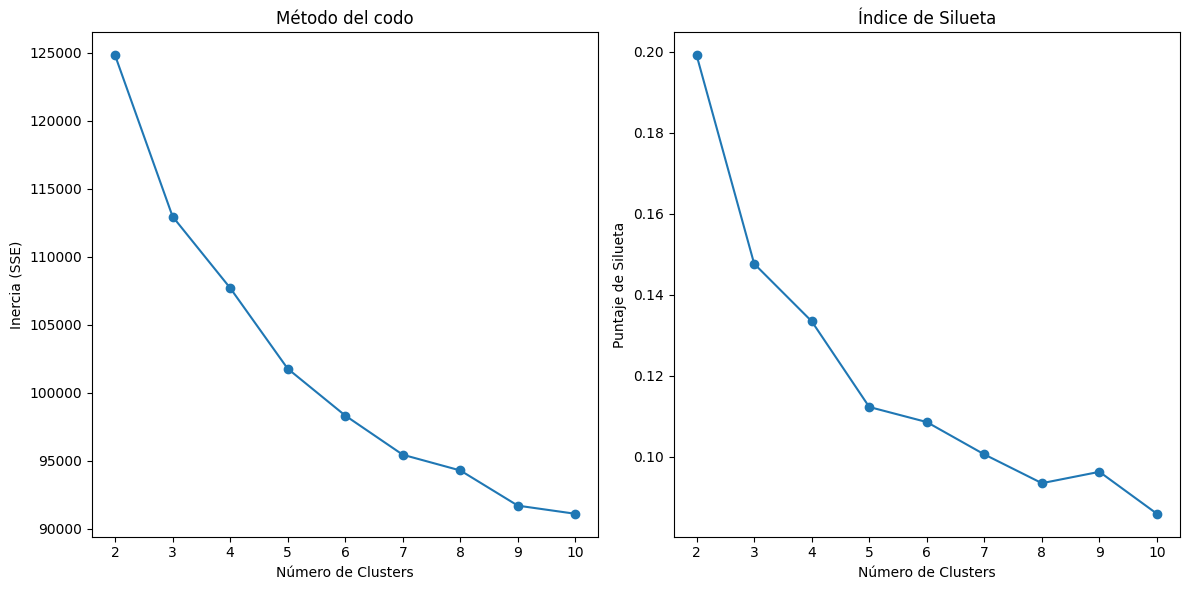

In [22]:

# Crear transformador para preprocesar (escalado y codificación)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_continuous),  # Escalado para continuas
        ('cat', OneHotEncoder(), categorical_columns + numerical_categorical)  # Codificación para categóricas
    ],
    remainder='drop'
)

# Aplicar preprocesamiento
processed_data = preprocessor.fit_transform(data)
print(f"\nDimensiones del Dataset Preprocesado: {processed_data.shape}")

# Determinar el número óptimo de clusters con el método del codo y el índice de silueta
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Probar entre 2 y 10 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(processed_data, kmeans.labels_))

# Visualizar el método del codo y el índice de silueta
plt.figure(figsize=(12, 6))

# Método del codo
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (SSE)')

# Índice de silueta
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Índice de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')

plt.tight_layout()
plt.show()


In [23]:
# Aplicar K-Means con 4 clusters como el número óptimo
n_optimal_clusters = 4
kmeans = KMeans(n_clusters=n_optimal_clusters, random_state=42)
kmeans.fit(processed_data)

# Agregar etiquetas de cluster al dataset original
data['Cluster'] = kmeans.labels_

# Resumen de los clusters
cluster_summary = data['Cluster'].value_counts()
cluster_summary


Cluster
1    4149
3    2868
2    2036
0    1753
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import pandas as pd

# Cargar los datos
file_path = 'data/data_cleaned.csv'
data = pd.read_csv(file_path)

# Identificar las columnas categóricas y numéricas
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear un pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Escalar variables numéricas
        ('cat', OneHotEncoder(), categorical_columns)  # Codificar variables categóricas
    ],
    remainder='drop'
)

# Aplicar preprocesamiento
processed_data = preprocessor.fit_transform(data)

# Aplicar K-Means nuevamente
n_clusters = 4  # Número óptimo de clusters basado en gráficos previos
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(processed_data)

# Asignar las etiquetas de clusters al dataset original
data['Cluster'] = kmeans.labels_

# Recalcular análisis descriptivo por cluster
numerical_data = data.select_dtypes(include=['int64', 'float64'])
cluster_analysis = numerical_data.groupby(data['Cluster']).mean()

# Mostrar estadísticas descriptivas de los clusters
print("\nAnálisis Descriptivo por Cluster:")
print(cluster_analysis)

# Exportar datos con los clusters asignados
output_path = 'data/clustered_data.csv'
data.to_csv(output_path, index=False)
print(f"\nDatos con clusters guardados en: {output_path}")





Análisis Descriptivo por Cluster:
              Edad  Family_Size  anno_nacimiento  Ingresos anuales brutos  \
Cluster                                                                     
0        76.715638     2.146913      1947.285264             74832.163587   
1        37.216120     2.930027      1986.802480             41708.593446   
2        31.290130     3.230641      1992.702227             26142.928215   
3        51.027108     2.641867      1972.952410             80562.504518   

         Gasto_medio_mensual_cuota  Abandono  Dias_cliente  \
Cluster                                                      
0                        55.853988  0.293375    312.388013   
1                        34.623561  0.069088    478.440213   
2                        30.525091  0.398804    209.653373   
3                        58.849398  0.365361    245.753614   

         Campanna_transformada  Edad_original_recalculated  
Cluster                                                     
0      

### Cluster 0
    Edad promedio: 76.7 años (el grupo más mayor).
    Tamaño familiar: 2.14 (el más pequeño).
    Ingresos anuales: €74,832 (nivel medio-alto).
    Gasto mensual medio: €55.85 (alto).
    Días como cliente: 312 días (nivel medio).
    Abandono: 29.3% (ligeramente alto).
    Interpretación: Personas mayores con ingresos estables, tienden a gastar más pero muestran un abandono promedio-alto. Estrategias personalizadas para retención podrían ser clave.
### Cluster 1
    Edad promedio: 37.2 años (joven-adulto).
    Tamaño familiar: 2.93 (promedio).
    Ingresos anuales: €41,708 (nivel medio).
    Gasto mensual medio: €34.62 (medio-bajo).
    Días como cliente: 478 días (mayor lealtad).
    Abandono: 6.9% (muy bajo).
    Interpretación: Clientes jóvenes y leales con ingresos moderados. Este grupo es clave para estrategias de fidelización y promoción de servicios adicionales.
### Cluster 2
    Edad promedio: 31.3 años (joven).
    Tamaño familiar: 3.23 (mayor tamaño familiar).
    Ingresos anuales: €26,142 (nivel bajo).
    Gasto mensual medio: €30.52 (bajo).
    Días como cliente: 209 días (menos tiempo como cliente).
    Abandono: 39.8% (alto).
    Interpretación: Jóvenes con ingresos bajos y alta probabilidad de abandono. Necesitan ofertas económicas y estrategias para retención temprana.
### Cluster 3
    Edad promedio: 51.0 años (adultos maduros).
    Tamaño familiar: 2.64 (promedio).
    Ingresos anuales: €80,562 (el más alto).
    Gasto mensual medio: €58.85 (el más alto).
    Días como cliente: 245 días (moderado).
    Abandono: 36.5% (alto).
    Interpretación: Adultos con altos ingresos y gastos, pero con una tasa de abandono elevada. Incentivos personalizados de alto valor podrían ser efectivos para este grupo.

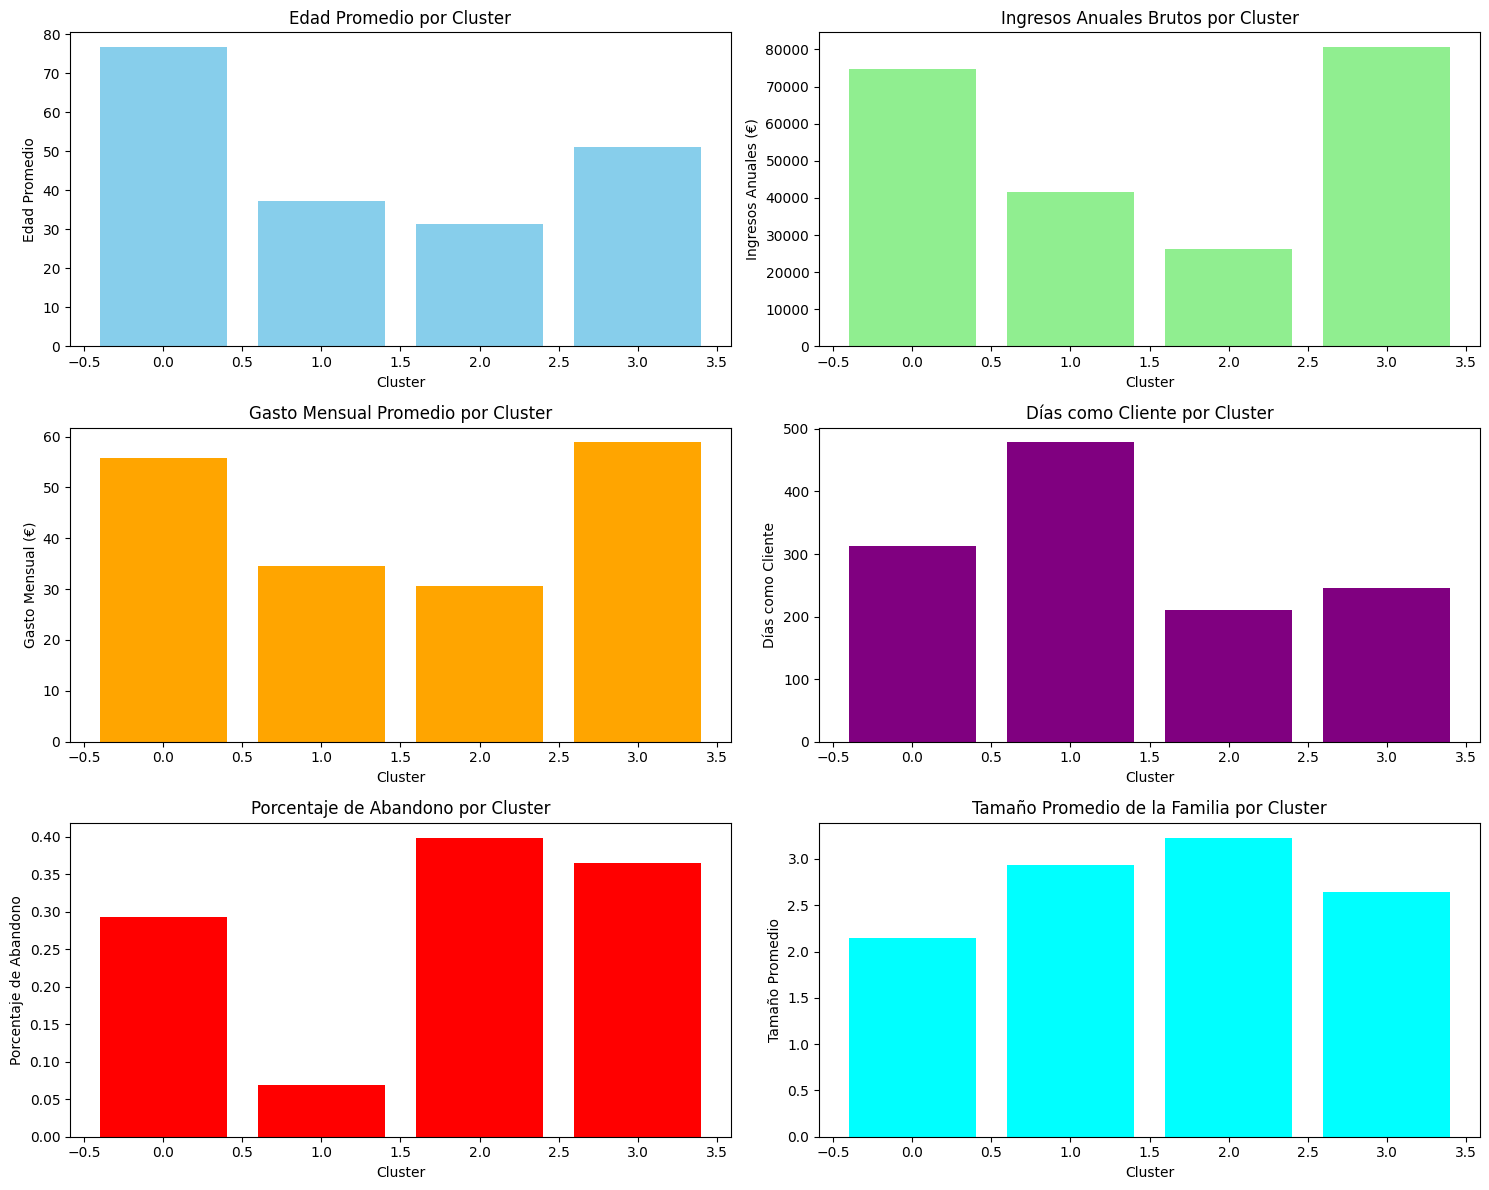

In [25]:
import matplotlib.pyplot as plt

# Crear gráficos para analizar los clusters
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Edad promedio por cluster
axes[0, 0].bar(cluster_analysis.index, cluster_analysis['Edad'], color='skyblue')
axes[0, 0].set_title('Edad Promedio por Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Edad Promedio')

# Ingresos anuales por cluster
axes[0, 1].bar(cluster_analysis.index, cluster_analysis['Ingresos anuales brutos'], color='lightgreen')
axes[0, 1].set_title('Ingresos Anuales Brutos por Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Ingresos Anuales (€)')

# Gasto mensual promedio por cluster
axes[1, 0].bar(cluster_analysis.index, cluster_analysis['Gasto_medio_mensual_cuota'], color='orange')
axes[1, 0].set_title('Gasto Mensual Promedio por Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Gasto Mensual (€)')

# Días como cliente por cluster
axes[1, 1].bar(cluster_analysis.index, cluster_analysis['Dias_cliente'], color='purple')
axes[1, 1].set_title('Días como Cliente por Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Días como Cliente')

# Abandono promedio por cluster
axes[2, 0].bar(cluster_analysis.index, cluster_analysis['Abandono'], color='red')
axes[2, 0].set_title('Porcentaje de Abandono por Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Porcentaje de Abandono')

# Tamaño de la familia promedio por cluster
axes[2, 1].bar(cluster_analysis.index, cluster_analysis['Family_Size'], color='cyan')
axes[2, 1].set_title('Tamaño Promedio de la Familia por Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('Tamaño Promedio')

plt.tight_layout()
plt.show()


### Conclusiones de las Gráficas por Cluster

1. **Edad Promedio:**
   - El **Cluster 0** está compuesto principalmente por clientes mayores (edad promedio: 76.7 años).
   - El **Cluster 2** representa el grupo más joven, con una edad promedio de 31.3 años.

2. **Ingresos Anuales Brutos:**
   - El **Cluster 3** tiene los ingresos más altos (€80,562), seguido por el **Cluster 0** (€74,832).
   - El **Cluster 2** tiene los ingresos más bajos (€26,142).

3. **Gasto Mensual Promedio:**
   - Los **Clusters 0 y 3** tienen el mayor gasto mensual promedio (€55.85 y €58.85, respectivamente).
   - El **Cluster 2** muestra el gasto más bajo (€30.52).

4. **Días como Cliente:**
   - El **Cluster 1** tiene el mayor tiempo promedio como cliente (478 días), destacando su lealtad.
   - El **Cluster 2** muestra el menor tiempo de permanencia (209 días).

5. **Porcentaje de Abandono:**
   - El **Cluster 2** tiene la tasa de abandono más alta (39.8%), mientras que el **Cluster 1** tiene la más baja (6.9%).

6. **Tamaño Promedio de la Familia:**
   - El **Cluster 2** cuenta con las familias más grandes (3.23 personas en promedio).
   - El **Cluster 0** tiene el tamaño familiar más pequeño (2.14 personas).

### Implicaciones y Estrategias
1. **Cluster 0:** Adultos mayores con ingresos estables. Ofrecer programas de fidelización y servicios personalizados para su comodidad.
2. **Cluster 1:** Jóvenes adultos leales con ingresos medios. Potenciar estrategias de recompra y promoción de servicios adicionales.
3. **Cluster 2:** Jóvenes con ingresos bajos y alta probabilidad de abandono. Diseñar ofertas económicas y estrategias de retención temprana.
4. **Cluster 3:** Adultos de altos ingresos y gasto significativo. Implementar programas VIP y beneficios exclusivos para retención.

Estas conclusiones destacan características clave para segmentar clientes y personalizar estrategias de marketing y retención.
